<a href="https://colab.research.google.com/github/devkumar326/SpamDetectionModel/blob/main/SpamDetectionmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#Importing Libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [4]:
df= pd.read_csv('/content/gdrive/My Drive/sms_spam.csv')
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.type.replace('spam', 1, inplace=True)
df.type.replace('ham', 0, inplace=True)

In [6]:
df.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5574, 2)

In [8]:
y = df.type

In [9]:
df.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: text, Length: 5574, dtype: object

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [12]:
X = vectorizer.fit_transform(df.text)
X.shape

(5574, 8586)

In [13]:
X.data

array([0.19367544, 0.34661851, 0.16250347, ..., 0.69423987, 0.53028734,
       0.48664807])

In [14]:
df.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [15]:
splt_txt1=df.text[0].split()
print(splt_txt1)

['Go', 'until', 'jurong', 'point,', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet...', 'Cine', 'there', 'got', 'amore', 'wat...']


In [16]:
len(splt_txt1)

20

In [17]:
print(X[0])

  (0, 8218)	0.1936754385697072
  (0, 1074)	0.34661850736522926
  (0, 3580)	0.16250347021789968
  (0, 2038)	0.29282687644410044
  (0, 1744)	0.33088546389448276
  (0, 4442)	0.29282687644410044
  (0, 8428)	0.23446497404204306
  (0, 3620)	0.19147848622350874
  (0, 1746)	0.29282687644410044
  (0, 1301)	0.25926284833436075
  (0, 2316)	0.2684353143416924
  (0, 5877)	0.27111240744926074
  (0, 4316)	0.34661850736522926
  (0, 3536)	0.15700708175427927


In [18]:
## 4316 is the position of the word jurong
vectorizer.get_feature_names()[8585] 

'zyada'

In [19]:
splt_txt2=df.text[1].split()
print(splt_txt2)

['Ok', 'lar...', 'Joking', 'wif', 'u', 'oni...']


In [20]:
len(splt_txt2)

6

In [21]:
print(X[1])

  (0, 5493)	0.5466195966483365
  (0, 8333)	0.4316309977097208
  (0, 4284)	0.5236769406481622
  (0, 4478)	0.4083285209202484
  (0, 5466)	0.27190435673704183


In [22]:
max(splt_txt2)

'wif'

In [23]:
max(vectorizer.get_feature_names())

'zyada'

In [24]:
len(vectorizer.get_feature_names())

8586

In [25]:
print (y.shape)
print (X.shape)

(5574,)
(5574, 8586)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
X_train

<4180x8586 sparse matrix of type '<class 'numpy.float64'>'
	with 35573 stored elements in Compressed Sparse Row format>

In [28]:
clf = naive_bayes.MultinomialNB()
model=clf.fit(X_train, y_train)

In [29]:
clf.feature_log_prob_

array([[-9.77311336, -9.77311336, -9.55891456, ..., -9.50688483,
        -9.77311336, -9.77311336],
       [-8.32004619, -7.47951669, -9.28059652, ..., -9.28059652,
        -9.03360849, -9.28059652]])

In [30]:
clf.coef_

array([[-8.32004619, -7.47951669, -9.28059652, ..., -9.28059652,
        -9.03360849, -9.28059652]])

In [31]:
predicted_class=model.predict(X_test)
print(predicted_class)

[0 0 0 ... 0 0 0]


In [32]:
print(y_test)

3690    0
3527    0
724     0
3370    0
468     0
       ..
19      1
4758    0
668     0
218     0
4660    0
Name: type, Length: 1394, dtype: int64


In [33]:
df.loc[[19]]

,type,text
19,1,England v Macedonia - dont miss the goals/team...


In [34]:
predicted_class[19]

0

In [35]:
prd=model.predict_proba(X_test)
prd

array([[0.99729642, 0.00270358],
       [0.98498819, 0.01501181],
       [0.9333622 , 0.0666378 ],
       ...,
       [0.99196715, 0.00803285],
       [0.9860348 , 0.0139652 ],
       [0.99650379, 0.00349621]])

In [36]:
clf.predict_proba(X_test)[:,0]

array([0.99729642, 0.98498819, 0.9333622 , ..., 0.99196715, 0.9860348 ,
       0.99650379])

In [37]:
roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])

0.997599437006686

In [38]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9860710353261697

In [39]:
clf.coef_

array([[-8.32004619, -7.47951669, -9.28059652, ..., -9.28059652,
        -9.03360849, -9.28059652]])

In [40]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(vectorizer, clf, 20)

In [41]:
print (importance)

{0: {'tops': [(-7.034722745167066, 'contact'), (-7.0192431775020125, 'send'), (-7.0180305556682505, 'nokia'), (-6.999660733091444, 'win'), (-6.976374830489329, 'urgent'), (-6.9345729881472495, 'uk'), (-6.892600549063332, '150p'), (-6.850619592906504, 'new'), (-6.834833692683523, 'cash'), (-6.6988571996726005, 'prize'), (-6.659696510546983, 'www'), (-6.576817336834772, 'reply'), (-6.573146319288703, 'ur'), (-6.543024438958931, 'stop'), (-6.529295177179554, 'text'), (-6.516552989904275, 'claim'), (-6.466812835224328, 'mobile'), (-6.378697897476828, 'txt'), (-6.064898023522728, 'free'), (-5.79056323187441, 'call')], 'bottom': [(-9.280596521664538, 'yoyyooo'), (-9.280596521664538, 'ystrday'), (-9.280596521664538, 'ything'), (-9.280596521664538, 'yummmm'), (-9.280596521664538, 'yummy'), (-9.280596521664538, 'yun'), (-9.280596521664538, 'yunny'), (-9.280596521664538, 'yuo'), (-9.280596521664538, 'yuou'), (-9.280596521664538, 'yup'), (-9.280596521664538, 'yupz'), (-9.280596521664538, 'zac'), 

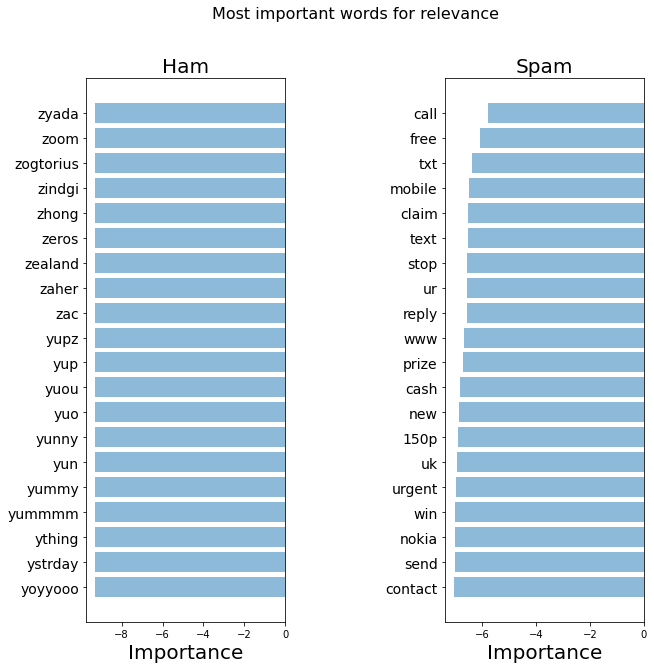

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Ham', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Spam', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")